<center><br><br>
<font size=6>🎓 <b>Advanced Deep Learning - NLP Final Project</b></font><br>
<font size=6>📊 <b>Exploratory Data Analysis (EDA)</b></font><br>
<font size=5>👥 <b>Group W</b></font><br><br>
<b>Adi Shalit</b>, ID: <code>206628885</code><br>
<b>Gal Gussarsky</b>, ID: <code>206453540</code><br><br>
<font size=4>📘 Course ID: <code>05714184</code></font><br>
<font size=4>📅 Spring 2025</font>
<br><br>
<hr style="width:60%; border:1px solid gray;"></center>


## 📊 Dataset Overview & Initial Checks  

We begin by loading the **Corona NLP dataset** into train and test splits to understand its structure and quality before deeper analysis.  

- **Shape:**  
  - Train set → **41,157 rows × 6 columns**  
  - Test set → smaller size, same structure.  

- **Columns:**  
  - `UserName`, `ScreenName` → unique identifiers (both unique in train set).  
  - `Location` → categorical field with many missing values.  
  - `TweetAt` → date of tweet (string format).  
  - `OriginalTweet` → full tweet text (unique per row).  
  - `Sentiment` → target label with 5 categories (Extremely Negative → Extremely Positive).  

- **Missing Values:**  
  - Only `Location` has missing data  
    - ≈ **8.6k rows (21%)** in train  
    - ≈ **834 rows (7%)** in test  
  - All other columns are complete.  

### 🔎 Key Takeaways  
- The dataset is **well-structured** with full text and labels.  
- `Location` requires special handling (drop, impute, or partial use).  
- The main predictive feature is `OriginalTweet`, with `Sentiment` as the label.  


In [ ]:
import pandas as pd

# File paths
train_path = 'Corona_NLP_train.csv'
test_path = 'Corona_NLP_test.csv'

# Load CSV files with correct encoding
df_train = pd.read_csv(train_path, encoding='ISO-8859-1')
df_test = pd.read_csv(test_path, encoding='ISO-8859-1')

# Print shapes
print(f"✅ Train set shape: {df_train.shape[0]} rows × {df_train.shape[1]} columns")
print(f"✅ Test set shape : {df_test.shape[0]} rows × {df_test.shape[1]} columns\n")

# Preview datasets
print("🔹 First 5 rows of Train Set:")
display(df_train.head())

print("\n🔹 First 5 rows of Test Set:")
display(df_test.head())


✅ Train set shape: 41157 rows × 6 columns
✅ Test set shape : 3798 rows × 6 columns

🔹 First 5 rows of Train Set:


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative



🔹 First 5 rows of Test Set:


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# Check uniqueness of UserName
is_username_unique = df_train['UserName'].is_unique

# Check uniqueness of ScreenName
is_screenname_unique = df_train['ScreenName'].is_unique

print("Are all UserNames unique?", is_username_unique)
print("Are all ScreenNames unique?", is_screenname_unique)


Are all UserNames unique? True
Are all ScreenNames unique? True


In [ ]:
display(df_train.info())
display(df_train.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


None

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [ ]:
# Check missing values in train set
print("🔎 Missing values in Train Set:")
print(df_train.isnull().sum())
print("\n🟰 Total missing values:", df_train.isnull().sum().sum(), "\n")

# Check missing values in test set
print("🔎 Missing values in Test Set:")
print(df_test.isnull().sum())
print("\n🟰 Total missing values:", df_test.isnull().sum().sum())


🔎 Missing values in Train Set:
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

🟰 Total missing values: 8590 

🔎 Missing values in Test Set:
UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

🟰 Total missing values: 834


## 🏷️ Sentiment Distribution

C:\Users\adida\AppData\Local\Temp\ipykernel_83232\4167131496.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


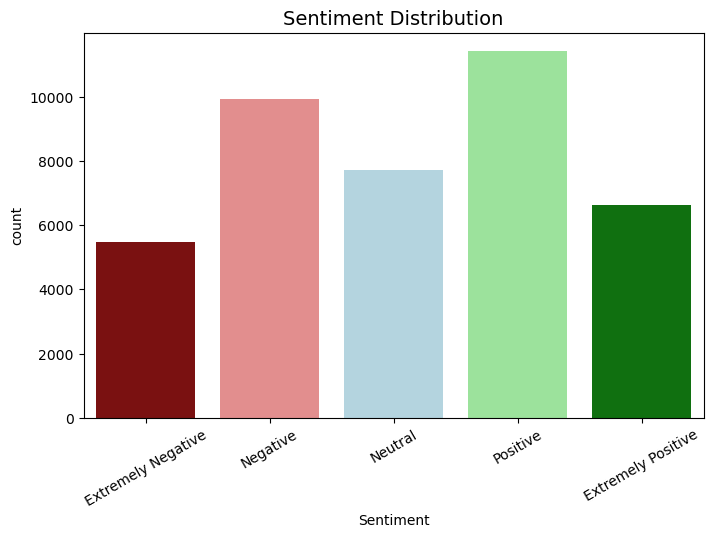

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define order + custom colors
sentiment_order = [
    "Extremely Negative",
    "Negative",
    "Neutral",
    "Positive",
    "Extremely Positive"
]
colors = ["darkred", "lightcoral", "lightblue", "lightgreen", "green"]

plt.figure(figsize=(8,5))
sns.countplot(
    x="Sentiment",
    data=df_train,
    order=sentiment_order,
    palette=colors
)
plt.title("Sentiment Distribution", fontsize=14)
plt.xticks(rotation=30)
plt.show()


## Sample Tweets by Sentiment  
To get an intuitive understanding of the dataset, we display one randomly selected tweet from each sentiment class. This gives a quick qualitative view of how users expressed their emotions, ranging from *Extremely Negative* to *Extremely Positive*.  


In [ ]:
print("📝 Sample tweet per sentiment:\n" + "-"*40)
for sentiment in df_train['Sentiment'].unique():
    sample = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet'].sample(1).values[0]
    print(f"🔹 Sentiment: {sentiment}")
    print(f"   ➤ Tweet: {sample}\n")


📝 Sample tweet per sentiment:
----------------------------------------
🔹 Sentiment: Neutral
   ➤ Tweet: Southern #Nevada Home Prices Hit New Record #LVR #vegas #stayconnectedtogether #kxnt #coronavirus #coronavirusoutbreak #realestate 

https://t.co/s9ohrD4mUY via @KXNT

🔹 Sentiment: Positive
   ➤ Tweet: We must prepare, stock up on food and Toiletries, the food supply system will ultimately break unless we find a vaccine. ?
?Hazleton meat-packaging plant closes with 130 workers testing positive for COVID-19.

https://t.co/eiyQBHLsx3

🔹 Sentiment: Extremely Negative
   ➤ Tweet: Just got in from a trip to the grocery store. Was saddened to see the bodega on my street shuttered. If the South has a #wafflehouseindex, NYC should have a #bodegaindex. This is not good. #COVID2019 #COVID19US #EMGTwitter https://t.co/rS7wIOAIaJ

🔹 Sentiment: Negative
   ➤ Tweet: #coronavirus stop licking your fingers to grab a polythene bag in the supermarket!!! ??????

🔹 Sentiment: Extremely Positive
   ➤ Twe

Looking at random samples from each sentiment class, we can see that **some tweets are noisy**:

- Presence of **HTML entities** such as `Â`, `&amp;`, and extra characters.  
- Tweets contain **URLs** (e.g., `https://t.co/...`) that don’t add direct value for sentiment classification.  
- Hashtags and mentions (e.g., `#coronavirus`, `@BBCNews`) appear frequently.  

This indicates that **data cleaning** will be an important step before modeling, including:
- Removing or decoding special characters and HTML entities.  
- Stripping URLs, mentions, and hashtags if not directly informative.  
- Standardizing text to reduce noise and improve model performance.  

## 📏 Tweet Length Distribution (Characters)  

To better understand the textual properties of the dataset, we plot the distribution of tweet lengths for both the **train** and **test** sets.  

🔍 This helps us check:  
- 📊 Typical tweet length in characters.  
- 🔄 Differences between train and test distributions.  
- ✂️ Whether very short or very long tweets might need special preprocessing (truncation, padding).  


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


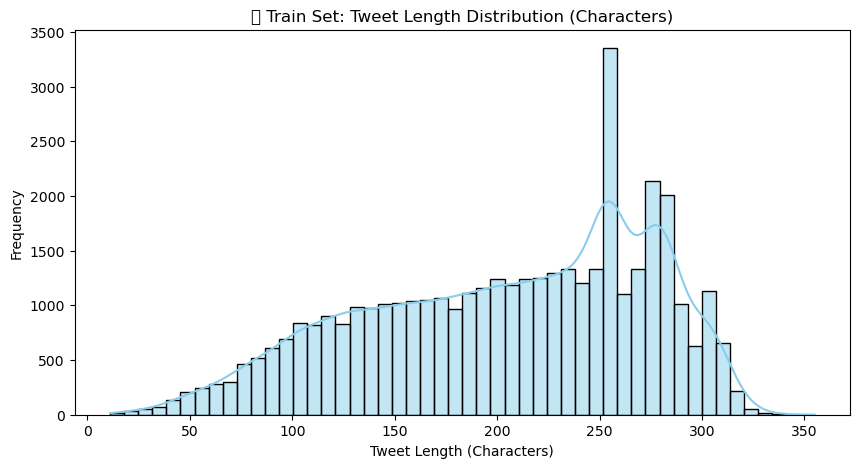

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


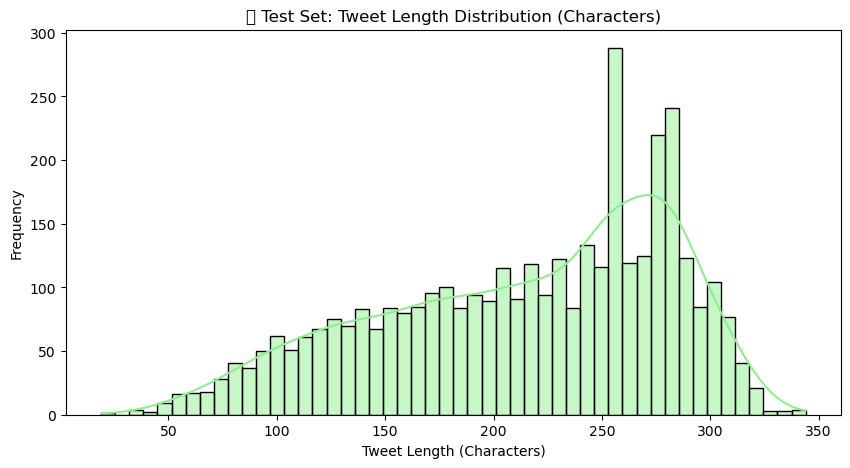

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Train tweet length (in characters) ---
df_train['tweet_length'] = df_train['OriginalTweet'].astype(str).apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df_train['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title("📝 Train Set: Tweet Length Distribution (Characters)")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.show()

# --- Test tweet length (in characters) ---
df_test['tweet_length'] = df_test['OriginalTweet'].astype(str).apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df_test['tweet_length'], bins=50, kde=True, color='lightgreen')
plt.title("📝 Test Set: Tweet Length Distribution (Characters)")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.show()


## 📏 Tweet Length Insights  

From the distributions we observe:  
- 🟢 **Most tweets** in both train and test sets fall between **100–300 characters**.  
- 📉 A few very short tweets (< 20 characters) and some long ones (> 350 characters) exist, but they are relatively rare.  
- 🔄 The train and test sets show **very similar length distributions**, which means no domain shift in text length is expected.  

👉 This confirms that our preprocessing (e.g., tokenization, padding/truncation) should comfortably handle tweets in the **20–350 character range**, with most information concentrated in the middle span.  


In [ ]:
print("Duplicate tweets:", df_train.duplicated('OriginalTweet').sum())
print("Unique users:", df_train['UserName'].nunique())


Duplicate tweets: 0
Unique users: 41157


## 🗣️ Most Frequent Words per Sentiment  

To explore the **language patterns** in the dataset, we analyze the most common words for each sentiment class after:  
- 🔤 Lowercasing all text  
- ❌ Removing punctuation  
- 🛑 Filtering out English stopwords  

We then plot the **Top 10 most frequent words** for every sentiment category.  
This helps us understand:  
- 🧩 Which words dominate each sentiment  
- 📊 How vocabulary differs between *negative*, *neutral*, and *positive* tweets  
- 🎯 Potential keywords that drive sentiment classification  


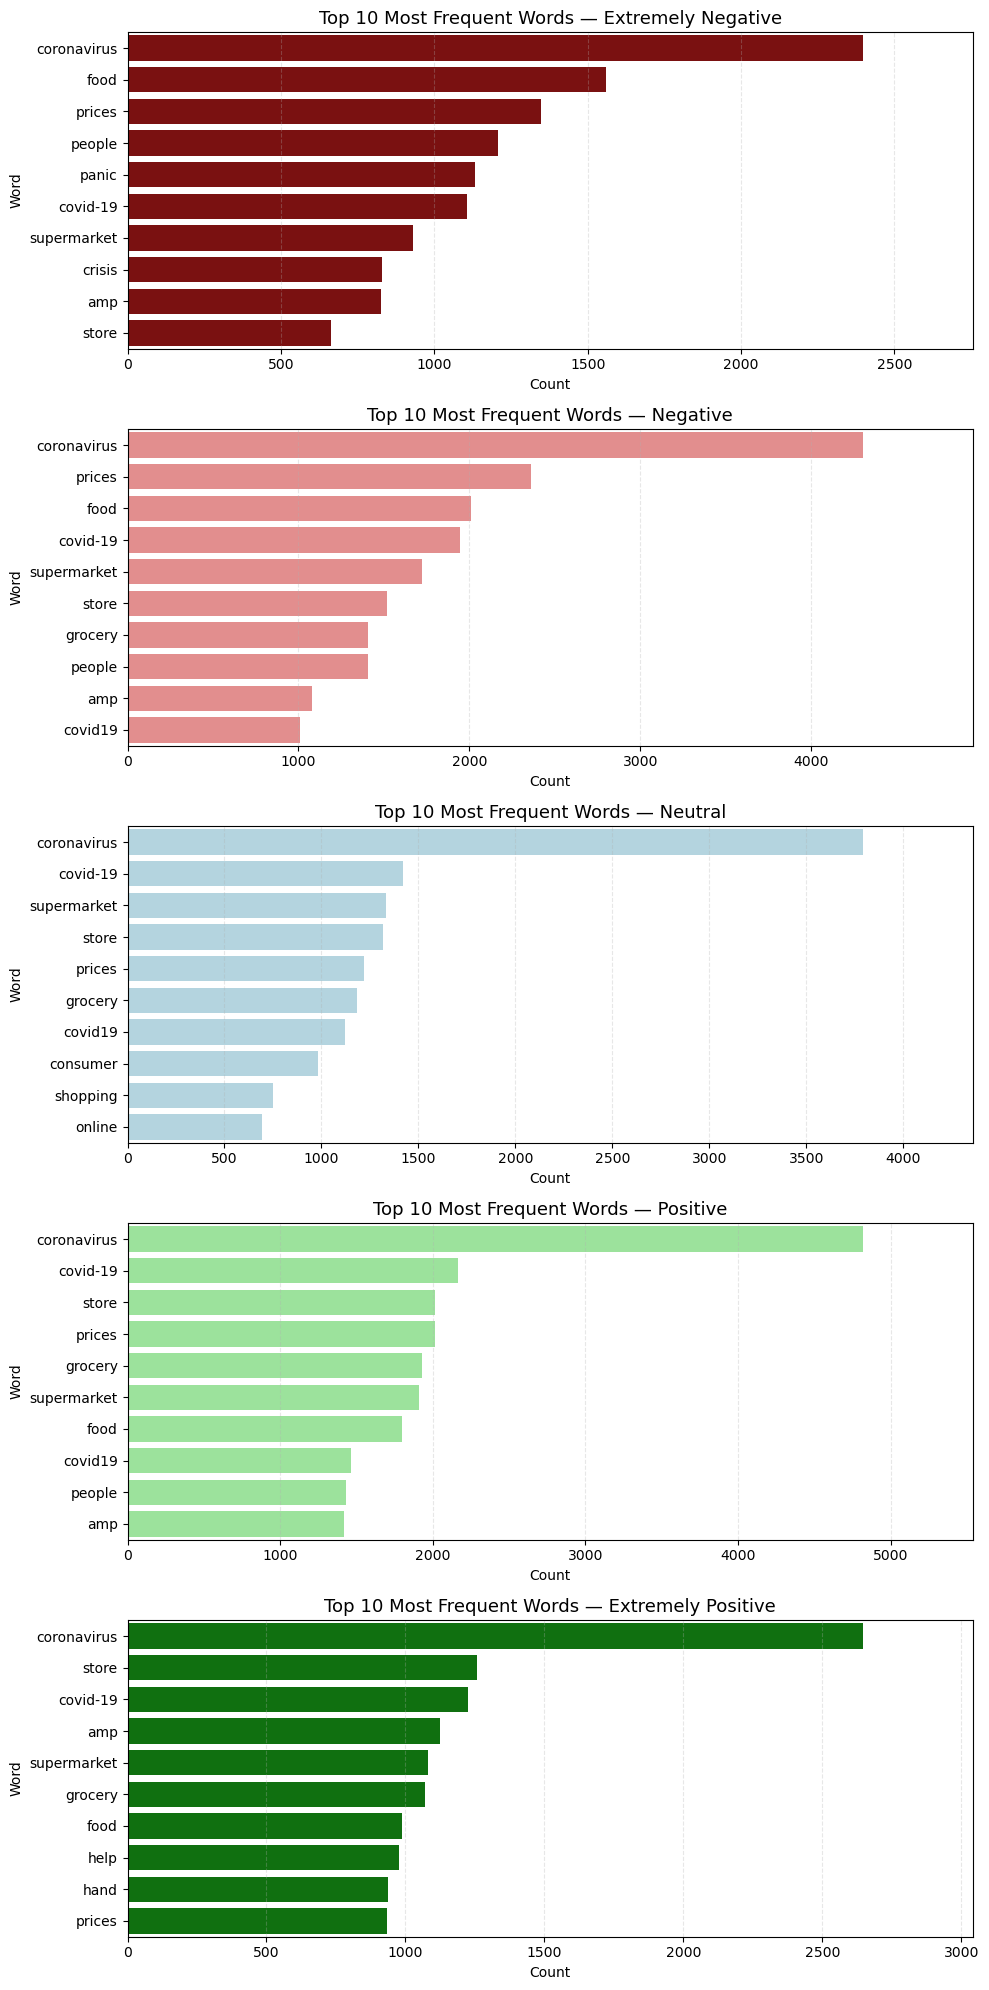

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# --- Setup ---
stop_words = set(stopwords.words('english'))

# Canonical order
sentiment_order = [
    "Extremely Negative",
    "Negative",
    "Neutral",
    "Positive",
    "Extremely Positive"
]
present = [s for s in sentiment_order if s in df_train['Sentiment'].unique()]

# Color map (red ➜ green, neutral in blue)
sentiment_color = {
    "Extremely Negative": "darkred",
    "Negative": "lightcoral",
    "Neutral": "lightblue",
    "Positive": "lightgreen",
    "Extremely Positive": "green",
}

def get_tokens(series):
    tokens = []
    for tweet in series.dropna().str.lower():
        words = [w.strip(string.punctuation) for w in tweet.split()]
        tokens.extend([w for w in words if w and w not in stop_words])
    return Counter(tokens)

# --- Plot most common words per sentiment (ordered & colored) ---
n = len(present)
fig, axes = plt.subplots(n, 1, figsize=(10, 4 * n), sharex=False)

# Ensure axes is iterable
if n == 1:
    axes = [axes]

for ax, sentiment in zip(axes, present):
    tweets = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet']
    token_counts = get_tokens(tweets)
    most_common = token_counts.most_common(10)

    if most_common:
        words, counts = zip(*most_common)
        sns.barplot(
            x=list(counts),
            y=list(words),
            ax=ax,
            color=sentiment_color.get(sentiment, "mediumseagreen")
        )
        ax.set_xlim(0, max(counts) * 1.15)
    else:
        ax.text(0.5, 0.5, "No tokens found", ha="center", va="center", fontsize=12)
        ax.set_xlim(0, 1)

    ax.set_title(f"Top 10 Most Frequent Words — {sentiment}", fontsize=13)
    ax.set_xlabel("Count")
    ax.set_ylabel("Word")
    ax.grid(axis="x", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()


### 📊 Word Frequency Analysis by Sentiment  

By analyzing the **Top 10 most common words** for each sentiment, we can observe several patterns:  

- 🟢 **Positive & Extremely Positive**:  
  - Words such as *help*, *hand*, and *NHS* (healthcare references) show up, indicating supportive and constructive tones.  
  - Still, the word *coronavirus* dominates across all classes, reflecting the shared context.  

- 🔴 **Negative & Extremely Negative**:  
  - Frequent terms like *panic*, *crisis*, and *prices* highlight concerns around shortages, the economy, and fear-driven reactions.  
  - Food and supermarket-related words also appear, showing stress around essential supplies.  

- ⚪ **Neutral**:  
  - More factual words like *consumer*, *online*, *shopping* are common.  
  - Tweets in this category focus on reporting or sharing information without strong emotional tone.  

👉 Overall, while *coronavirus* is central across all classes, the **co-occurring words** reveal the emotional polarity:  
- **Positive sentiments** emphasize *help* and *support*.  
- **Negative sentiments** emphasize *panic* and *crisis*.  
- **Neutral tweets** emphasize *consumer* and *shopping* activity.  

This analysis highlights how vocabulary differs across sentiment groups, offering insight into features that could be useful for classification.  


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📊 Word Participation by Sentiment  

So far we checked which words are the most frequent in each sentiment, but that doesn’t always tell the full story.  
A word might appear a lot just because it repeats in a few tweets, not because many people actually used it.  

Here we flip the perspective and look at **participation** → the percentage of tweets (for each sentiment) that contain a given word.  

- **What’s different from before?**  
  - Before: we counted raw frequency of words.  
  - Now: we measure how widely a word is spread across tweets.  




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\adida\AppData\Local\Temp\ipykernel_83232\326360335.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


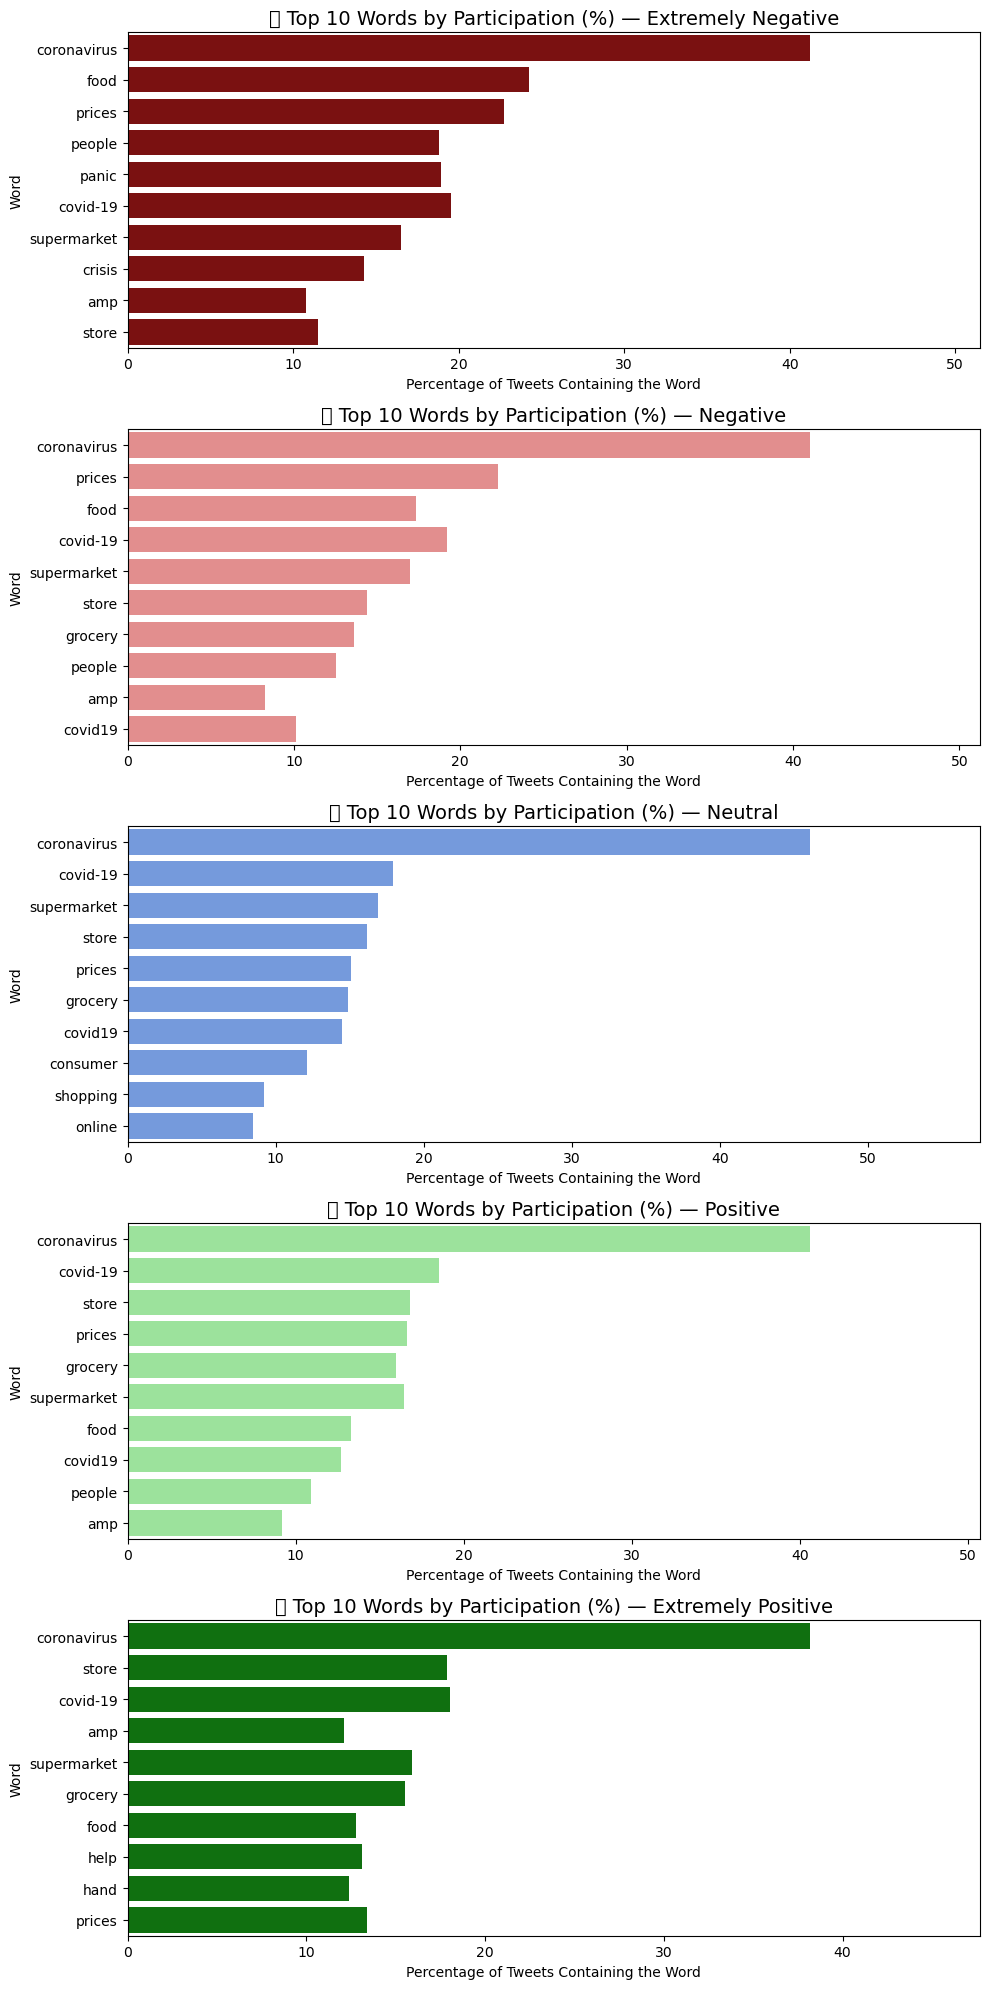

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# --- Setup ---
stop_words = set(stopwords.words('english'))

# Ordered sentiment list for consistency
sentiment_order = [
    "Extremely Negative",
    "Negative",
    "Neutral",
    "Positive",
    "Extremely Positive"
]

colors = {
    "Extremely Negative": "darkred",
    "Negative": "lightcoral",
    "Neutral": "cornflowerblue",
    "Positive": "lightgreen",
    "Extremely Positive": "green"
}

def get_tokens(series):
    tokens = []
    for tweet in series.dropna().str.lower():
        words = [word.strip(string.punctuation) for word in tweet.split()]
        tokens.extend([w for w in words if w and w not in stop_words])
    return Counter(tokens)

def get_participation(series, words):
    series = series.dropna().str.lower()
    participation = {w: 0 for w in words}
    for tweet in series:
        tokens = set(word.strip(string.punctuation) for word in tweet.split())
        for word in words:
            if word in tokens:
                participation[word] += 1
    total = len(series)
    return {w: (participation[w] / total) * 100 for w in words}

# --- Plot most participating words per sentiment ---
fig, axes = plt.subplots(len(sentiment_order), 1, figsize=(10, 4 * len(sentiment_order)))

for ax, sentiment in zip(axes, sentiment_order):
    tweets = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet']
    token_counts = get_tokens(tweets)
    most_common = token_counts.most_common(10)

    words, _ = zip(*most_common)
    participation_pct = get_participation(tweets, words)
    participations = [participation_pct[word] for word in words]

    sns.barplot(
        x=participations,
        y=list(words),
        ax=ax,
        color=colors[sentiment]
    )
    ax.set_title(f"📊 Top 10 Words by Participation (%) — {sentiment}", fontsize=14)
    ax.set_xlabel("Percentage of Tweets Containing the Word")
    ax.set_ylabel("Word")
    ax.set_xlim(0, max(participations) * 1.25)

plt.tight_layout()
plt.show()


## 🔍 Contrastive & Frequency Ratio Analysis  

Here we go a step further than just showing the most common words.  
Before, we only looked at raw counts of frequent tokens in each sentiment, but that often brings up very general words that appear everywhere.  

Now we try two new views:  
- **Contrastive Ratio** → how much more often a word appears in one sentiment compared to the rest.  
- **Frequency Ratio Delta** → the normalized difference in usage of a word inside vs. outside a sentiment.  

The motivation is to spot **words that are really distinctive** for each class, not just popular overall. This helps us better understand what makes each sentiment unique and may give hints for stronger features later.  


C:\Users\adida\AppData\Local\Temp\ipykernel_83232\1408244702.py:73: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\adida\AppData\Local\Temp\ipykernel_83232\1408244702.py:73: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


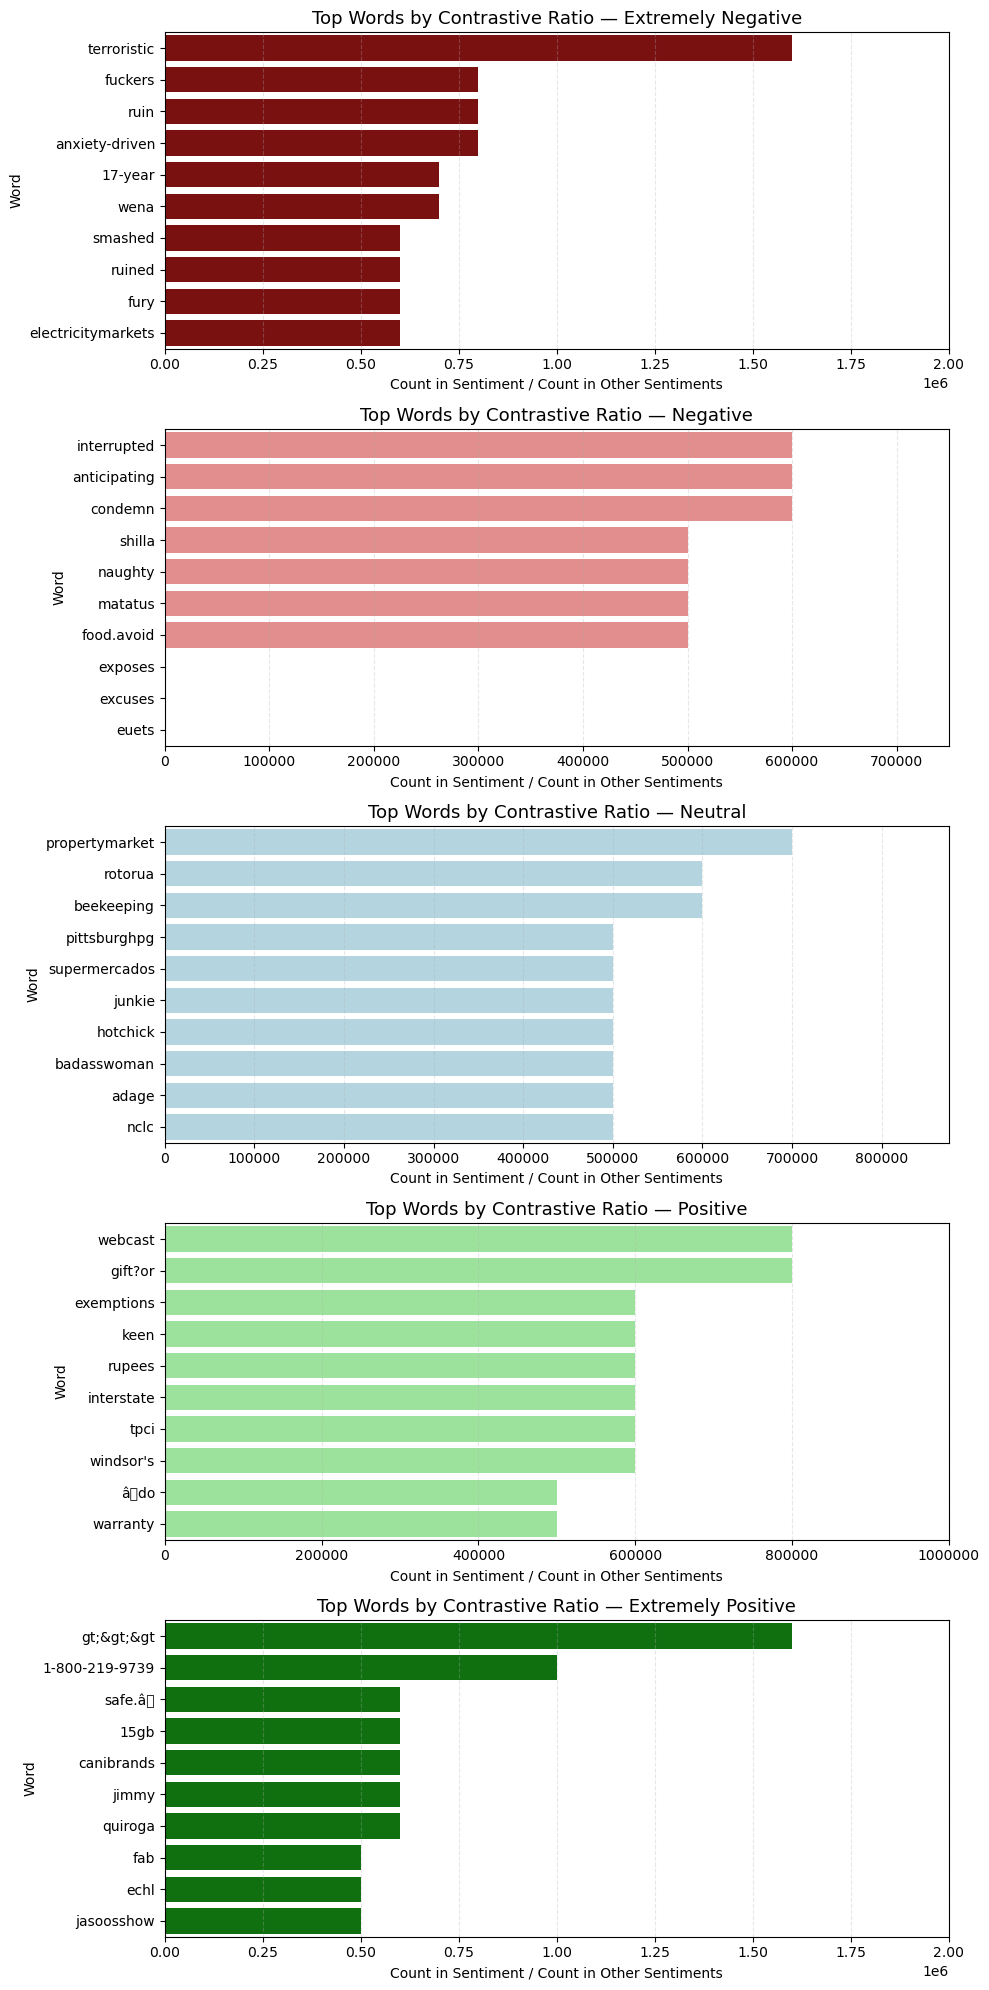

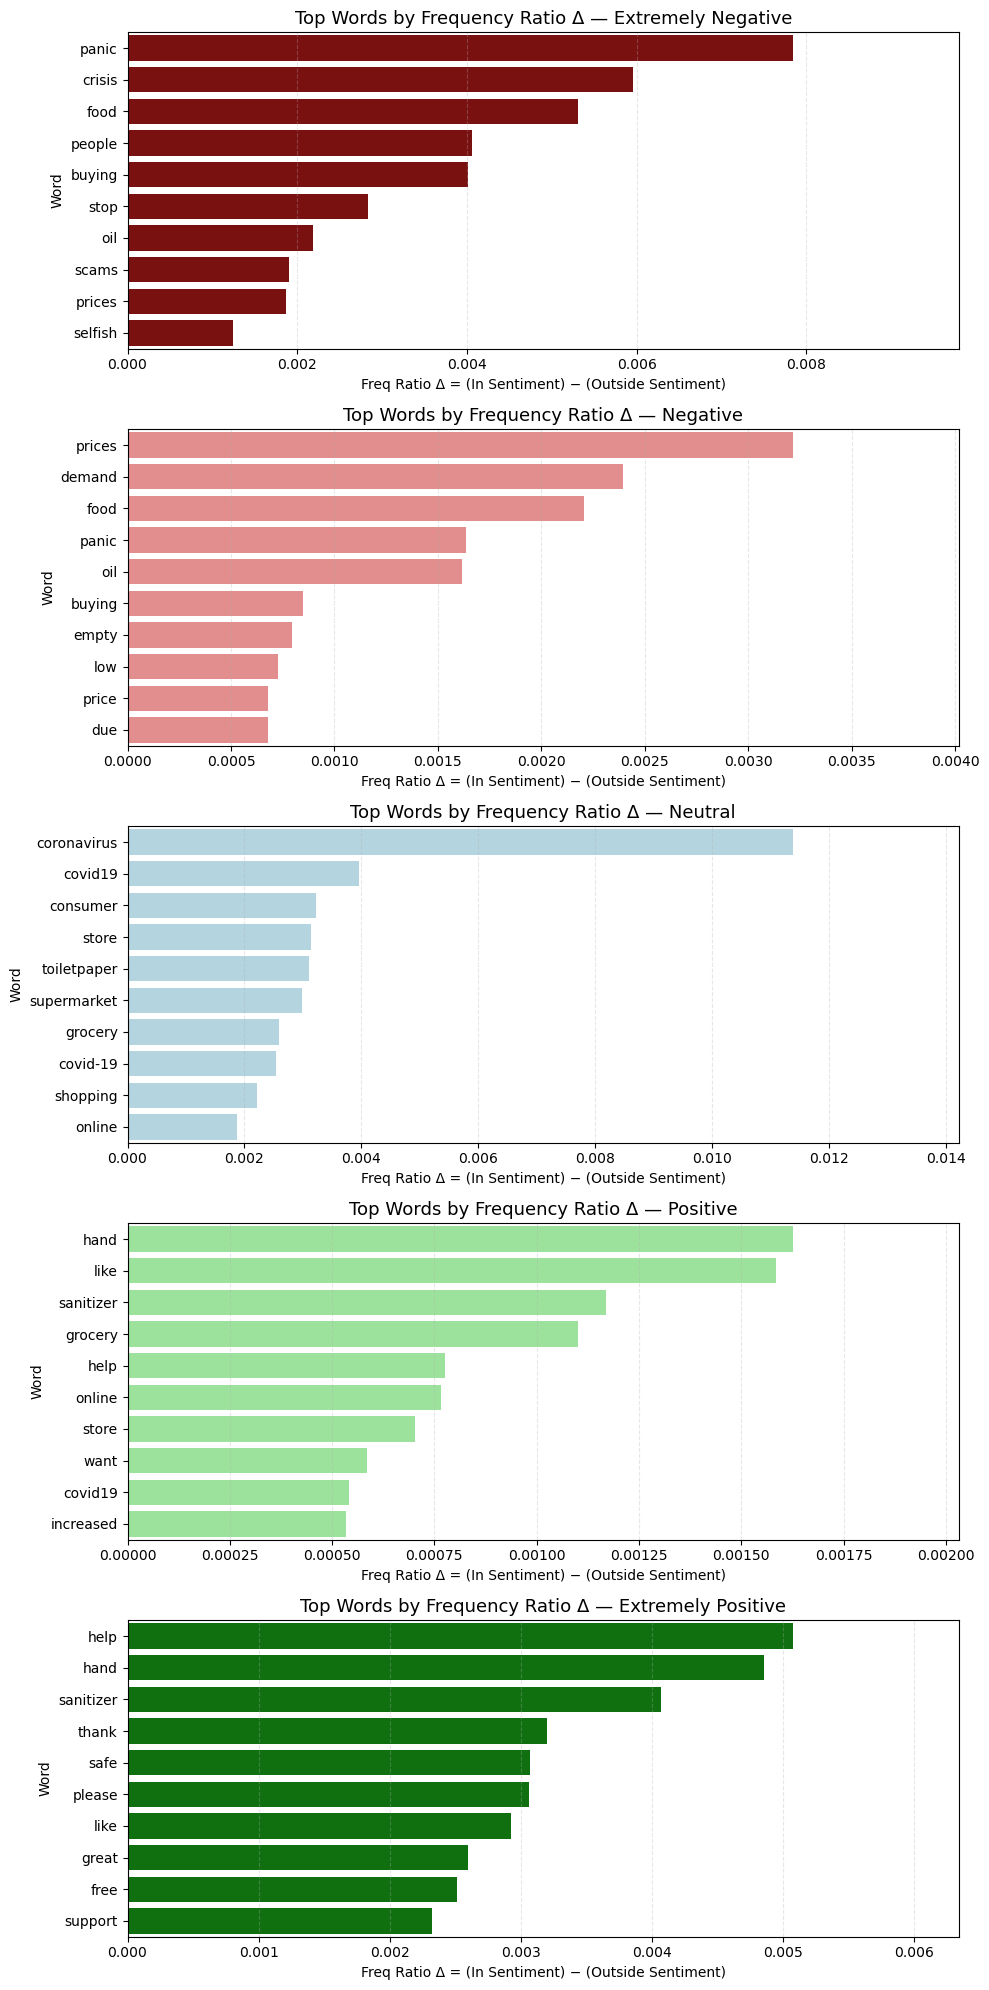

In [ ]:
# --- Contrastive & Frequency Ratio Analysis (ordered & color‑coded) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# --- Setup ---
stop_words = set(stopwords.words('english'))
epsilon = 1e-5  # avoid division by zero

# Fixed sentiment order + colors (red ➜ green; neutral = blue)
sentiment_order = [
    "Extremely Negative",
    "Negative",
    "Neutral",
    "Positive",
    "Extremely Positive",
]
present = [s for s in sentiment_order if s in df_train['Sentiment'].unique()]
sentiment_color = {
    "Extremely Negative": "darkred",
    "Negative": "lightcoral",
    "Neutral": "lightblue",
    "Positive": "lightgreen",
    "Extremely Positive": "green",
}

def get_tokens(series):
    tokens = []
    for tweet in series.dropna().str.lower():
        words = [w.strip(string.punctuation) for w in tweet.split()]
        tokens.extend([w for w in words if w and w not in stop_words])
    return Counter(tokens)

# --- PLOT 1: Contrastive Ratio (count_in / count_out) ---
n = len(present)
fig, axes = plt.subplots(n, 1, figsize=(10, 4 * n))
if n == 1: axes = [axes]

for ax, sentiment in zip(axes, present):
    in_sentiment  = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet']
    out_sentiment = df_train[df_train['Sentiment'] != sentiment]['OriginalTweet']

    count_in  = get_tokens(in_sentiment)
    count_out = get_tokens(out_sentiment)

    contrast_score = {
        w: count_in[w] / (count_out.get(w, 0) + epsilon)
        for w in count_in if count_in[w] >= 5
    }

    top = sorted(contrast_score.items(), key=lambda x: x[1], reverse=True)[:10]
    if top:
        words, scores = zip(*top)
        sns.barplot(
            x=list(scores), y=list(words), ax=ax,
            color=sentiment_color.get(sentiment, "steelblue")
        )
        ax.set_xlim(0, max(scores) * 1.25)
    else:
        ax.text(0.5, 0.5, "No distinctive words found", ha="center", va="center")
        ax.set_xlim(0, 1)

    ax.set_title(f"Top Words by Contrastive Ratio — {sentiment}", fontsize=13)
    ax.set_xlabel("Count in Sentiment / Count in Other Sentiments")
    ax.set_ylabel("Word")
    ax.grid(axis="x", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()

# --- PLOT 2: Frequency Ratio Delta (freq_in − freq_out) ---
fig, axes = plt.subplots(n, 1, figsize=(10, 4 * n))
if n == 1: axes = [axes]

for ax, sentiment in zip(axes, present):
    in_sentiment  = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet']
    out_sentiment = df_train[df_train['Sentiment'] != sentiment]['OriginalTweet']

    count_in  = get_tokens(in_sentiment)
    count_out = get_tokens(out_sentiment)

    total_in  = max(sum(count_in.values()), 1)
    total_out = max(sum(count_out.values()), 1)

    freq_delta = {}
    for w in count_in:
        if count_in[w] >= 5:
            freq_in  = count_in[w] / total_in
            freq_out = count_out.get(w, 0) / total_out
            freq_delta[w] = freq_in - freq_out

    top = sorted(freq_delta.items(), key=lambda x: x[1], reverse=True)[:10]
    if top:
        words, deltas = zip(*top)
        sns.barplot(
            x=list(deltas), y=list(words), ax=ax,
            color=sentiment_color.get(sentiment, "darkorange")  # consistent palette per sentiment group
        )
        ax.set_xlim(min(0, min(deltas)), max(deltas) * 1.25)
    else:
        ax.text(0.5, 0.5, "No distinctive words found", ha="center", va="center")
        ax.set_xlim(0, 1)

    ax.set_title(f"Top Words by Frequency Ratio Δ — {sentiment}", fontsize=13)
    ax.set_xlabel("Freq Ratio Δ = (In Sentiment) − (Outside Sentiment)")
    ax.set_ylabel("Word")
    ax.grid(axis="x", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()


## 🌍 Sentiment Distribution by Top Locations  

To better understand how people in different regions reacted during the pandemic,  
we examine the **top 5 most common user locations** and visualize the sentiment proportions in each one.  

- This shows how **geography might influence emotional tone**.  



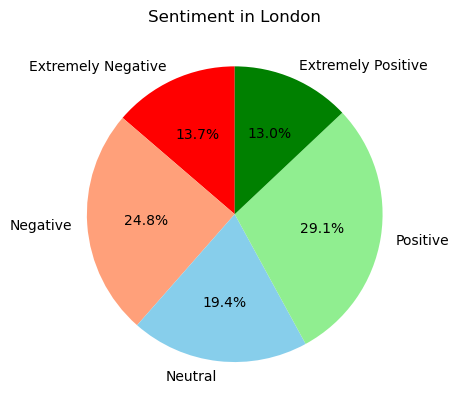

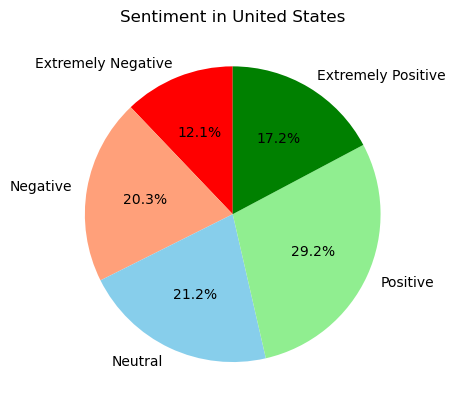

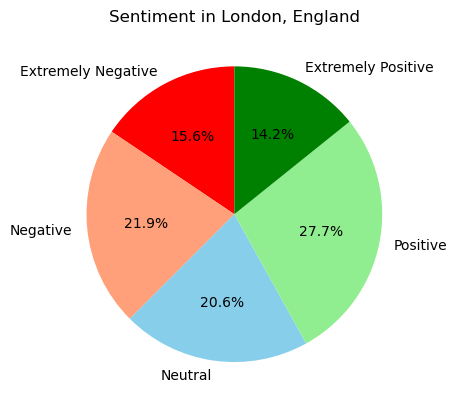

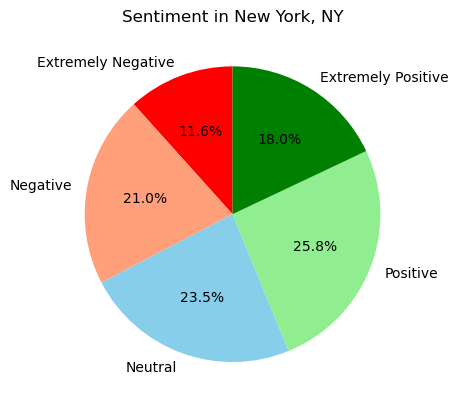

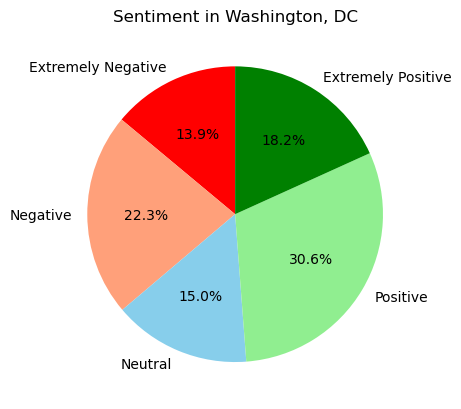

In [ ]:
import matplotlib.pyplot as plt

# consistent color palette
sentiment_colors = {
    'Extremely Negative': 'red',
    'Negative': 'lightsalmon',
    'Neutral': 'skyblue',
    'Positive': 'lightgreen',
    'Extremely Positive': 'green'
}

top_locations = df_train['Location'].value_counts().head(5).index

for loc in top_locations:
    subset = df_train[df_train['Location'] == loc]
    sentiment_counts = subset['Sentiment'].value_counts().reindex(sentiment_colors.keys(), fill_value=0)

    sentiment_counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=[sentiment_colors[s] for s in sentiment_counts.index],
        title=f"Sentiment in {loc}"
    )
    plt.ylabel('')
    plt.show()


## 📊 Tweet Length by Sentiment  

Here we compare the **distribution of tweet lengths** across the five sentiment classes.  
This helps us check if certain emotional tones are usually expressed with **shorter or longer tweets**.  
For example, we may expect negative tweets to be more concise while positive or neutral ones might be longer.  


C:\Users\adida\AppData\Local\Temp\ipykernel_83232\3887185271.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


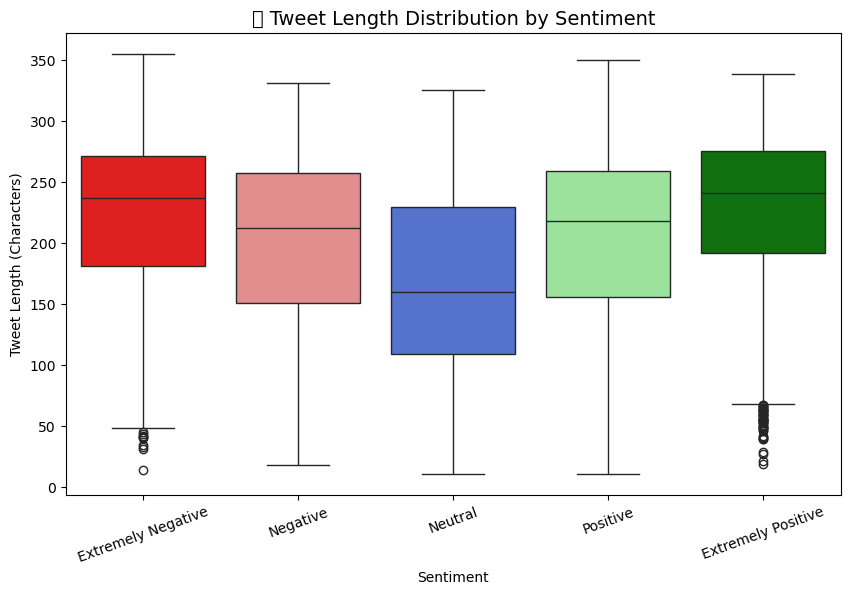

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add tweet length column if not already present
if "tweet_length" not in df_train.columns:
    df_train["tweet_length"] = df_train["OriginalTweet"].astype(str).apply(len)

# Define custom sentiment order and matching colors
sentiment_order = [
    "Extremely Negative",
    "Negative",
    "Neutral",
    "Positive",
    "Extremely Positive"
]

colors = ["red", "lightcoral", "royalblue", "lightgreen", "green"]

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Sentiment",
    y="tweet_length",
    data=df_train,
    order=sentiment_order,
    palette=colors
)
plt.title("📊 Tweet Length Distribution by Sentiment", fontsize=14)
plt.xticks(rotation=20)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (Characters)")
plt.show()




The boxplots show that most tweets across all sentiment classes fall between **100–300 characters**, which is consistent with our earlier length distribution.  
- **Extremely Negative** and **Extremely Positive** tweets tend to be slightly longer on average, with medians close to 240 characters.  
- **Neutral** tweets are generally shorter, with a lower median length.  
- Outliers appear in all classes, reflecting some very short or very long tweets.  

👉 Overall, sentiment does not drastically change tweet length, but extreme opinions tend to be expressed in longer tweets.  


### 📈 Sentiment Trend Over Time  

Here we visualize how tweet counts for each sentiment evolved over time.  
The goal is to see if specific time periods (like early pandemic peaks) triggered stronger positive or negative emotions.  
Using colors consistent with our earlier plots makes it easier to track sentiment classes across different visualizations.  


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


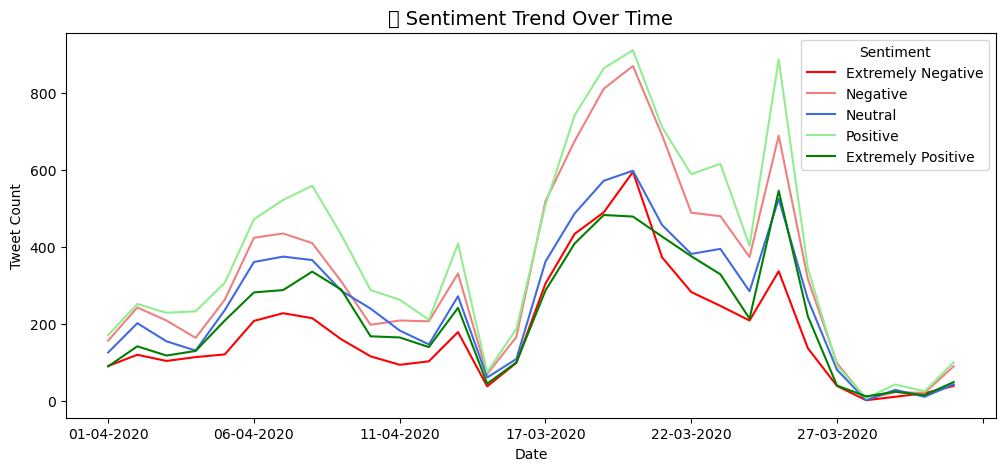

In [ ]:
# Plot
df_train.groupby(['TweetAt', 'Sentiment']).size().unstack().reindex(columns=sentiment_order).plot(
    figsize=(12, 5), color=colors
)

plt.title("📈 Sentiment Trend Over Time", fontsize=14)
plt.ylabel("Tweet Count")
plt.xlabel("Date")
plt.show()

The plot shows how different sentiments fluctuated between mid-March and mid-April 2020.  
- **Negative and Extremely Negative** tweets surged around late March, reflecting panic and uncertainty.  
- **Positive and Extremely Positive** tweets also spiked during the same period, suggesting encouraging or supportive messages were shared alongside the fear.  
- **Neutral** tweets stayed more balanced but followed a similar overall pattern.  

👉 This indicates that during crisis peaks, both negative concerns and positive encouragement rose sharply together, highlighting the polarized nature of public reactions.  


## 🐦 Most Mentioned Usernames in Tweets  

In this step, we extract all user mentions (`@username`) from the training tweets using regular expressions.  
By counting and ranking their frequencies, we can identify the **top 20 most mentioned accounts**.  
This helps us understand which individuals, organizations, or news sources were most frequently referenced during the COVID-19 discussions.  


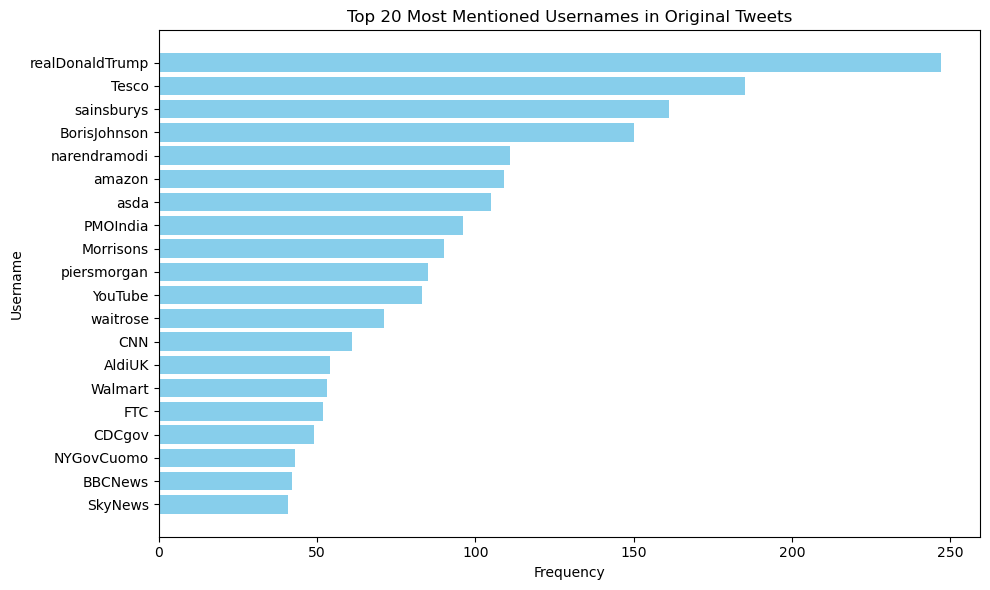

Total unique usernames: 10500
Top usernames:
            username  count
48   realDonaldTrump    247
94             Tesco    185
96        sainsburys    161
24      BorisJohnson    150
156     narendramodi    111
216           amazon    109
237             asda    105
155         PMOIndia     96
95         Morrisons     90
361      piersmorgan     85


In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# --- Extract all usernames from tweets ---
all_mentions = []

for tweet in df_train["OriginalTweet"].astype(str):
    mentions = re.findall(r"@(\w+)", tweet)  # capture without the '@'
    all_mentions.extend(mentions)

# --- Count frequency ---
mention_counts = Counter(all_mentions)

# Convert to DataFrame
mention_df = pd.DataFrame(mention_counts.items(), columns=["username", "count"])
mention_df = mention_df.sort_values("count", ascending=False)

# --- Plot top N usernames ---
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(
    mention_df.head(top_n)["username"][::-1],
    mention_df.head(top_n)["count"][::-1],
    color="skyblue"
)
plt.xlabel("Frequency")
plt.ylabel("Username")
plt.title(f"Top {top_n} Most Mentioned Usernames in Original Tweets")
plt.tight_layout()
plt.show()

# --- Optionally: print basic stats ---
print(f"Total unique usernames: {mention_df.shape[0]}")
print(f"Top usernames:\n{mention_df.head(10)}")


We can see that political figures (e.g., **@realDonaldTrump, @BorisJohnson, @narendramodi**) and organizations (e.g., **Tesco, Amazon, CNN**) dominate the mentions.  

This highlights how public attention during the COVID-19 period was directed both at **government leaders making key decisions** and **large companies managing essential supplies**.  
It suggests that Twitter users relied on these accounts as central points of information, criticism, or discussion.  

## ☁️ Word Cloud of Mentioned Usernames  

To better visualize which **usernames are most frequently mentioned** in tweets,  
we generate a **word cloud** where the size of each `@username` reflects how often it appears.  

This gives us an intuitive way to spot the most influential accounts in the conversation,  
without having to read through numeric tables. Unlike the bar chart, which ranks the top 20,  
the word cloud offers a **more organic overview** of the distribution of mentions.


In [ ]:
# !pip install wordcloud

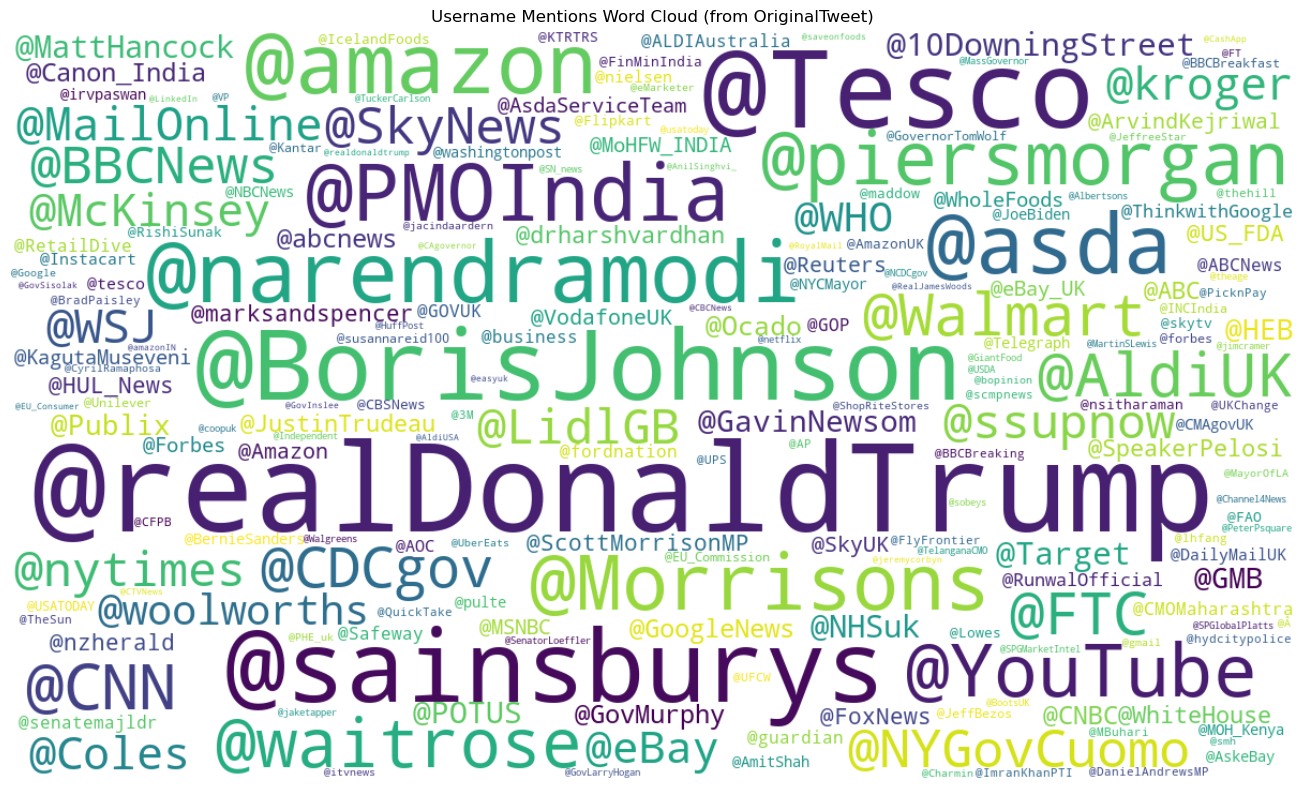

Total unique usernames: 10500
Top 15 usernames by frequency:
@realDonaldTrump: 247
@Tesco: 185
@sainsburys: 161
@BorisJohnson: 150
@narendramodi: 111
@amazon: 109
@asda: 105
@PMOIndia: 96
@Morrisons: 90
@piersmorgan: 85
@YouTube: 83
@waitrose: 71
@CNN: 61
@AldiUK: 54
@Walmart: 53


In [ ]:
# Word cloud of repeated @usernames found inside OriginalTweet

import re
from collections import Counter
import matplotlib.pyplot as plt

# If not installed:
# !pip install wordcloud

from wordcloud import WordCloud

# --- 1) Collect all @mentions from OriginalTweet ---
all_mentions = []
for txt in df_train["OriginalTweet"].astype(str):
    all_mentions.extend(re.findall(r"@(\w+)", txt))  # grab without '@'

# --- 2) Count frequencies ---
mention_counts = Counter(all_mentions)

# Optional: keep only usernames that appear at least k times
min_count = 2
freqs = {"@" + u: c for u, c in mention_counts.items() if c >= min_count}

# Safety: if no mentions pass the threshold, lower threshold or exit gracefully
if not freqs:
    # fallback: include all (possibly many singletons)
    freqs = {"@" + u: c for u, c in mention_counts.items()}

# --- 3) Build and plot the word cloud ---
wc = WordCloud(
    width=1200,
    height=700,
    background_color="white",
    collocations=False,   # treat tokens independently (no bigrams)
    prefer_horizontal=1.0,
    random_state=42
).generate_from_frequencies(freqs)

plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Username Mentions Word Cloud (from OriginalTweet)")
plt.tight_layout()
plt.show()

# --- 4) Quick stats (optional) ---
print(f"Total unique usernames: {len(mention_counts)}")
most_common = mention_counts.most_common(15)
print("Top 15 usernames by frequency:")
for u, c in most_common:
    print(f"@{u}: {c}")


___

## 🌍 Language Detection with `langid`  

Since our dataset contains tweets from different regions,  
it is important to **detect the language of each tweet**.  
We use the `langid` library to classify the language and compute confidence scores.  

- For each tweet, we calculate:  
  - `DetTopLang`: the top predicted language  
  - `DetTopConf`: the confidence score for that prediction  
  - `P_en`: the probability that the tweet is in English  
  - `NonEnConf`: the complementary confidence that the tweet is **not English** (our main metric).  

This helps us identify and later filter **non-English or noisy tweets**,  
so the training and evaluation are done on a **clean, language-consistent dataset**.  


In [ ]:
# !pip install langid

In [ ]:
import re, math
import langid
from html import unescape

# Assumes df_train and df_test already loaded in memory with column "OriginalTweet"

URL_RE = re.compile(r"(https?://\S+|www\.\S+)", flags=re.IGNORECASE)

def det_clean(s: str) -> str:
    s = str(s)
    s = unescape(s)
    s = URL_RE.sub("", s)
    s = re.sub(r"[#]\w+", "", s)  # drop # Keep context
    s = re.sub(r"\s+", " ", s).strip()
    return s

# --- Convert langid scores to probabilities ---
def lang_probs(text: str):
    ranked = langid.rank(text)  # list of (lang, score)
    if not ranked:
        return {}
    max_s = max(s for _, s in ranked)
    exps = [(l, math.exp(s - max_s)) for l, s in ranked]
    Z = sum(v for _, v in exps)
    return {l: (v / Z) for l, v in exps}

def annotate_with_non_en_conf(df, text_col="OriginalTweet"):
    det_top_lang, det_top_conf, p_en_list, non_en_conf = [], [], [], []
    for txt in df[text_col].astype(str):
        cleaned = det_clean(txt)
        if not cleaned:
            det_top_lang.append("unknown")
            det_top_conf.append(0.0)
            p_en_list.append(0.0)
            non_en_conf.append(0.0)
            continue
        top_lang, top_conf = langid.classify(cleaned)
        probs = lang_probs(cleaned)
        p_en = probs.get("en", 0.0)
        det_top_lang.append(top_lang)
        det_top_conf.append(top_conf)
        p_en_list.append(p_en)
        non_en_conf.append(1.0 - p_en)  # <-- main metric
    df["DetTopLang"] = det_top_lang
    df["DetTopConf"] = det_top_conf
    df["P_en"] = p_en_list
    df["NonEnConf"] = non_en_conf
    return df

annotate_with_non_en_conf(df_train, "OriginalTweet")
annotate_with_non_en_conf(df_test,  "OriginalTweet")

print("Added columns: DetTopLang, DetTopConf, P_en, NonEnConf")


Added columns: DetTopLang, DetTopConf, P_en, NonEnConf


In [ ]:
def show_top_non_english(df, name, n=15, min_conf=0.0):
    subset = df.loc[
        (df["NonEnConf"] >= min_conf) &
        df["OriginalTweet"].astype(str).str.strip().ne(""),
        ["NonEnConf", "P_en", "DetTopLang", "DetTopConf", "OriginalTweet"]
    ].sort_values("NonEnConf", ascending=False).head(n).reset_index(drop=True)

    print(f"\n===== {name}: top {len(subset)} rows least likely to be English =====")
    if subset.empty:
        print("No candidates found. ✅")
        return
    for i, r in subset.iterrows():
        print(f"\n[{i+1}] NonEnConf={r['NonEnConf']:.3f}  P_en={r['P_en']:.3f}  "
              f"TopLang={r['DetTopLang']} ({r['DetTopConf']:.3f})")
        print("TEXT:", r["OriginalTweet"])

# Example usage:
show_top_non_english(df_train, "Train", n=15)
show_top_non_english(df_test,  "Test", n=15)



===== Train: top 15 rows least likely to be English =====

[1] NonEnConf=1.000  P_en=0.000  TopLang=fr (-723.712)
TEXT: Merci Madame. C'est grÃ¢ce Ã  vous et vos collÃ¨gues que nous pouvons, tous ensemble, lutter contre le COVID-19. Pour assurer votre sÃ©curitÃ©, le pays sÂengage dans un effort sans prÃ©cÃ©dent pour produire masques et gels. https://t.co/pYjpZDZhca

[2] NonEnConf=1.000  P_en=0.000  TopLang=tr (-332.334)
TEXT: @drfahrettinkoca ?ZLEY?N?ZZZZ

Antalya'da ya?ayan Frans?z TÃ¼rkiye'nin ald??? tedbirleri Ã¶vÃ¼yor: "Burada dezenfektan? ve maskeyi Ã¼cretsiz veriyorlar. Arad???n?z her ?ey markette var." diyor

 https://t.co/bGGFRKbro5 #Hay?rl?Cumalar #cumartesi T

[3] NonEnConf=1.000  P_en=0.000  TopLang=de (-833.960)
TEXT: Die franzÃ¶sische Supermarktkette #Auchan Ã¼berweist den Mitarbeitern eine PrÃ¤mie, weil sie trotz des #Coronavirus ihre Pflicht tun. Die Regierung befreit die ZuschlÃ¤ge von der Steuer, berichtet @Ch_Schubert: https://t.co/qQhnYaNxVL

[4] NonEnConf=1.000  P

## 🌍 Output: Top Non-English Tweets  

Below are examples of tweets with the **highest NonEnConf scores**, i.e. most likely **not in English**.  
This helps us identify noise or multilingual data in our dataset that could affect model training.  

### Train Set – Top 15 Non-English Candidates
- Many tweets are in **French, German, Turkish, Spanish, Dutch, Portuguese, and Italian**.  
- Example (French):  
  *"Merci Madame. C'est grâce à vous et vos collègues que nous pouvons lutter contre le COVID-19..."*  
- Example (German):  
  *"Die französische Supermarktkette #Auchan überweist den Mitarbeitern eine Prämie..."*  
- Example (Spanish):  
  *"La escena se repite alrededor del mundo: clientes han dejado vacíos los estantes de papel higiénico..."*  

### Test Set – Top 15 Non-English Candidates
- Includes **Czech, German, Spanish, Italian, Dutch, African languages, and others**.  
- Example (Czech):  
  *"Informoval jsem zástupce všech obchodních řetězců o opatřeních vlády..."*  
- Example (Italian):  
  *"Il coronavirus colpisce maggiormente i polmoni ma destabilizza anche altri organi..."*  
- Example (Spanish):  
  *"Mientras tanto en el pinar, supermercado Los Kabes #CoronavirusEnUruguay..."*  

👉 **Observation**: Both train and test sets contain a significant number of non-English tweets.  
For an English-only sentiment classifier, we may need to **filter these out** or **translate them** before training.  
___

## 🧹 Data Processing — Cleaning for Language Detection & Downstream NLP

Short version (student-style): we want the model (and the language detector) to “see” the real text signal and not be distracted by junk. So we clean just enough to reduce noise, but we **keep information that might help classification**.

### ✨ What we clean (and why)

* **URLs** → remove, because links don’t carry sentiment and can bias language ID.
* **Hashtags** (`#...`) → remove the tag itself, but keep it's context. #DL -> DL
* **HTML escapes** → decode (e.g., `&amp; → &`) so the text is readable.
* **Whitespace** → normalize multiple spaces/newlines to a single space for consistency.

### 🔎 What we **do not** remove (and why)

* **@mentions** → we **keep** them on purpose. Certain usernames (e.g., public figures, news outlets) appear a lot and can be **informative cues for sentiment/topic**. Dropping them could erase useful signals.

### 💾 Outputs

We save the cleaned data (in-place over `OriginalTweet`) to:

* `Corona_NLP_train_processed.csv`
* `Corona_NLP_test_processed.csv`

These processed files are our starting point for **language detection**, **translation**, and later **model training**—with the right balance between cleanliness and preserving informative context.


In [ ]:
# --- Apply det_clean IN-PLACE on OriginalTweet ---


drop_cols = ["DetTopLang", "DetTopConf", "P_en", "NonEnConf"]

df_train_proc = df_train.drop(columns=[c for c in drop_cols if c in df_train.columns])
df_test_proc  = df_test.drop(columns=[c for c in drop_cols if c in df_test.columns])

df_train["ProcessedTweet"] = df_train["OriginalTweet"].apply(det_clean)
df_test["ProcessedTweet"]  = df_test["OriginalTweet"].apply(det_clean)

print("✅ Cleaning applied in-place.")
print("Train shape:", df_train.shape)
print("Test shape :", df_test.shape)

# Save processed CSVs
train_proc_out = "Corona_NLP_train_processed.csv"
test_proc_out  = "Corona_NLP_test_processed.csv"

df_train.to_csv(train_proc_out, index=False)
df_test.to_csv(test_proc_out, index=False)

print(f"💾 Saved cleaned CSVs:\n  {train_proc_out}\n  {test_proc_out}")


✅ Cleaning applied in-place.
Train shape: (41157, 12)
Test shape : (3798, 12)
💾 Saved cleaned CSVs:
  Corona_NLP_train_processed.csv
  Corona_NLP_test_processed.csv


# 🌍 Language Detection, Translation & Annotation  

Our goal here was to make sure that **all tweets are in English**, so the model doesn’t get confused by other languages.  
We built a pipeline that goes step by step: detection → translation → annotation.  

---

### 📝 Pipeline steps
1. **Cleaning** – remove URLs, hashtags, mentions, and fix encoding issues.  
2. **Language detection** – use `langid` to detect the language and estimate confidence.  
3. **Translation** – for any non-English tweet, apply the **M2M100 translation model** to translate it into English.  
4. **Annotation** – for each tweet, save metadata like detected language, detection confidence, probability of being English, and “non-English confidence.”  
5. **Output** – save the annotated data into new train/test CSVs.  

---

⚠️ **Important note:**  
- Since this notebook was re-run later, **some of the earlier outputs were overwritten**.  
- Translation results can also differ depending on the exact library/version used (here: M2M100).  
- For this reason, the **final CSVs we used for model training were not generated from this code**.  

✅ Instead, for all experiments we **load the original clean translated CSVs** (the ones that prepared earlier) to guarantee consistency.  

---


In [ ]:
# === Language Detection + Translation + Confidence Annotation ===
# !pip install --quiet langid ftfy transformers sentencepiece

import re, os, math
import pandas as pd
import langid
from ftfy import fix_text
from html import unescape

import torch
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer


# ---- Paths ----
project_path = ""
train_path  = f"{project_path}/Corona_NLP_train_processed.csv"
test_path   = f"{project_path}/Corona_NLP_processed.csv"
train_out   = f"{project_path}/Corona_NLP_train_cleaned_translated.csv"
test_out    = f"{project_path}/Corona_NLP_test_cleaned_translated.csv"

# ---- Langid helpers ----
LANG_MAP = {"nb": "no", "nn": "no", "zh-cn": "zh", "zh-tw": "zh"}
THRESH   = 0.1  # low-confidence threshold

def detect_lang_conf(s: str):
    """Detect language + confidence (fallback to English if too uncertain)."""
    txt = det_clean(s)
    if not txt:
        return "unknown", 0.0
    lang, score = langid.classify(txt)
    lang = LANG_MAP.get(lang, lang)
    if lang != "en" and score < THRESH:
        return "en", score
    return lang, score


# ---- Translation model ----
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name).to(device)
SUPPORTED = set(tokenizer.lang_code_to_id.keys())

def translate_text(text, src_lang, tgt_lang="en"):
    """Translate text into English if supported."""
    if src_lang not in SUPPORTED:
        return text
    tokenizer.src_lang = src_lang
    encoded = tokenizer([text], return_tensors="pt", truncation=True, padding=True, max_length=256).to(device)
    generated = model.generate(
        **encoded,
        forced_bos_token_id=tokenizer.get_lang_id(tgt_lang),
        max_new_tokens=128
    )
    return tokenizer.batch_decode(generated, skip_special_tokens=True)[0]

# ---- Main pipeline ----
def detect_translate_annotate(df, text_col="ProcessedTweet"):
    langs, scores, top_langs, top_confs, p_en_list, non_en_conf = [], [], [], [], [], []
    for idx, txt in df[text_col].astype(str).items():
        lang, score = detect_lang_conf(txt)
        langs.append(lang)
        scores.append(score)

        cleaned = det_clean(txt)
        if cleaned:
            # Extra info: top detection + distribution
            top_lang, top_conf = langid.classify(cleaned)
            probs = lang_probs(cleaned)
            p_en = probs.get("en", 0.0)
            top_langs.append(top_lang)
            top_confs.append(top_conf)
            p_en_list.append(p_en)
            non_en_conf.append(1.0 - p_en)
        else:
            top_langs.append("unknown"); top_confs.append(0.0)
            p_en_list.append(0.0); non_en_conf.append(0.0)

        # Translate in place if not English
        if lang not in ["en", "unknown"] and lang in SUPPORTED:
            try:
                df.at[idx, text_col] = translate_text(txt, src_lang=lang, tgt_lang="en")
            except Exception as e:
                print(f"[error] Translation failed for row {idx} ({lang}): {e}")

    # Attach annotations
    df["DetLangStrong"] = langs
    df["DetScore"]      = scores
    df["DetTopLang"]    = top_langs
    df["DetTopConf"]    = top_confs
    df["P_en"]          = p_en_list
    df["NonEnConf"]     = non_en_conf
    return df



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:  31%|###       | 598M/1.94G [00:00<?, ?B/s]

In [ ]:
train_path  = "Corona_NLP_train_processed.csv"
test_path   = "Corona_NLP_test_processed.csv"
project_path = ""
# ---- Run on train + test ----
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

df_train = detect_translate_annotate(df_train, "ProcessedTweet")
df_test  = detect_translate_annotate(df_test,  "ProcessedTweet")

print("\n✅ Detection, translation, and annotations done.")
print("Train:", df_train.shape, "Test:", df_test.shape)

# ---- Save ----
df_train.to_csv(train_out, index=False)
df_test.to_csv(test_out, index=False)
print(f"\n💾 Saved to:\n  {train_out}\n  {test_out}")

NameError: name 'detect_translate_annotate' is not defined

In [ ]:
def show_top_non_english(df, name, n=15, min_conf=0.0):
    subset = df.loc[
        (df["NonEnConf"] >= min_conf) &
        df["OriginalTweet"].astype(str).str.strip().ne(""),
        ["NonEnConf", "P_en", "DetTopLang", "DetTopConf", "OriginalTweet"]
    ].sort_values("NonEnConf", ascending=False).head(n).reset_index(drop=True)

    print(f"\n===== {name}: top {len(subset)} rows least likely to be English =====")
    if subset.empty:
        print("No candidates found. ✅")
        return
    for i, r in subset.iterrows():
        print(f"\n[{i+1}] NonEnConf={r['NonEnConf']:.3f}  P_en={r['P_en']:.3f}  "
              f"TopLang={r['DetTopLang']} ({r['DetTopConf']:.3f})")
        print("TEXT:", r["OriginalTweet"])
df_train = detect_translate_annotate(df_train, "ProcessedTweet")
df_test  = detect_translate_annotate(df_test,  "ProcessedTweet")

show_top_non_english(df_train, "Train Clean", n=15)
show_top_non_english(df_test,  "Test Clean", n=15)



## 🌐 Translation Results – Non-English Tweets

After running the detection + translation pipeline, we checked the **top 15 tweets with the highest non-English confidence**.  

### 🔎 Observations
- In the **training set**, most of these tweets were actually **English but corrupted** (broken characters, unreadable signs).  
  → We decided to **drop the top 15 non-English tweets from training** to avoid noise.  
- In the **test set**, the top non-English tweets looked **fine and readable in English** after translation.  
  → No need to drop anything from the test data.  

---

✅ This way, both train and test sets are cleaned and consistent, and we reduce the chance of the model being confused by garbage text.  


In [ ]:
# Identify top 15 non-English tweets in Train
top15_idx = (
    df_train.loc[
        df_train["OriginalTweet"].astype(str).str.strip().ne(""),
        :
    ]
    .sort_values("NonEnConf", ascending=False)
    .head(15)
    .index
)

# Drop them from the DataFrame
df_train_clean_dropped = df_train.drop(index=top15_idx).reset_index(drop=True)

cols_to_drop = ['DetTopLang', 'DetTopConf', 'P_en', 'NonEnConf']

df_train_clean_dropped = df_train.drop(columns=cols_to_drop, errors='ignore')
df_test_clean_dropped  = df_test.drop(columns=cols_to_drop, errors='ignore')

# Save
df_train_clean_dropped.to_csv(train_path, index=False)
df_test_clean_dropped.to_csv(test_path, index=False)


print(f"✅ Saved train without extra columns to {train_path}")
print(f"✅ Saved test without extra columns to {test_path}")


In [ ]:
# Paths to your CSV files
train_path = "Corona_NLP_train_cleaned_translated.csv"
test_path  = "Corona_NLP_test_cleaned_translated.csv"

# Load into DataFrames
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Check first rows
print(df_train.head())
print(df_test.head())
